In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

import tensorflow_datasets as tfds

In [44]:
mnist_dataset, mnist_info =tfds.load(name="mnist", with_info=True, as_supervised=True)

mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']
num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples,tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image,label):
  image = tf.cast(image,tf.float32)
  image /= 255.
  return image,label

scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_train.map(scale)

# let's also shuffle the data

BUFFER_SIZE = 10000
# this BUFFER_SIZE parameter is here for cases when we're dealing with enormous datasets
# then we can't shuffle the whole dataset in one go because we can't fit it all in memory
# so instead TF only stores BUFFER_SIZE samples in memory at a time and shuffles them
# if BUFFER_SIZE=1 => no shuffling will actually happen
# if BUFFER_SIZE >= num samples => shuffling is uniform
# BUFFER_SIZE in between - a computational optimization to approximate uniform shuffling

# luckily for us, there is a shuffle method readily available and we just need to specify the buffer size
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# once we have scaled and shuffled the data, we can proceed to actually extracting the train and validation
# our validation data would be equal to 10% of the training set, which we've already calculated
# we use the .take() method to take that many samples
# finally, we create a batch with a batch size equal to the total number of validation samples
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)

# similarly, the train_data is everything else, so we skip as many samples as there are in the validation dataset
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

# determine the batch size
BATCH_SIZE = 100

# we can also take advantage of the occasion to batch the train data
# this would be very helpful when we train, as we would be able to iterate over the different batches
train_data = train_data.batch(BATCH_SIZE)

validation_data = validation_data.batch(num_validation_samples)

# batch the test data
test_data = test_data.batch(num_test_samples)


# takes next batch (it is the only batch)
# because as_supervized=True, we've got a 2-tuple structure
validation_inputs, validation_targets = next(iter(validation_data))


In [45]:
input_size = 784
output_size = 10

hidden_layer_size = 200

model = tf.keras.Sequential([

                             tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),

                             tf.keras.layers.Dense(output_size, activation='softmax')

])

In [46]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [47]:
NUM_EPOCHS = 5

model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs,validation_targets),verbose=2)

Epoch 1/5
540/540 - 10s - loss: 0.2544 - accuracy: 0.9262 - val_loss: 0.1300 - val_accuracy: 0.9605 - 10s/epoch - 19ms/step
Epoch 2/5
540/540 - 5s - loss: 0.0991 - accuracy: 0.9689 - val_loss: 0.0778 - val_accuracy: 0.9762 - 5s/epoch - 9ms/step
Epoch 3/5
540/540 - 7s - loss: 0.0644 - accuracy: 0.9796 - val_loss: 0.0653 - val_accuracy: 0.9812 - 7s/epoch - 12ms/step
Epoch 4/5
540/540 - 6s - loss: 0.0502 - accuracy: 0.9842 - val_loss: 0.0491 - val_accuracy: 0.9867 - 6s/epoch - 10ms/step
Epoch 5/5
540/540 - 6s - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0411 - val_accuracy: 0.9890 - 6s/epoch - 11ms/step


In [48]:
test_loss,test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss,test_accuracy*100.))

6/6 [==============================] - 2s 352ms/step - loss: 0.0252 - accuracy: 0.9921
Test loss: 0.03. Test accuracy: 99.21%


In [49]:
y_predicted = model.predict(test_data)
y_predicted[0]

6/6 [==============================] - 2s 297ms/step


array([3.30967942e-09, 1.07712740e-05, 7.02991043e-09, 2.73879213e-08,
       9.99952734e-01, 1.16581134e-07, 5.34212008e-09, 9.16308181e-06,
       8.58888143e-07, 2.63307375e-05], dtype=float32)

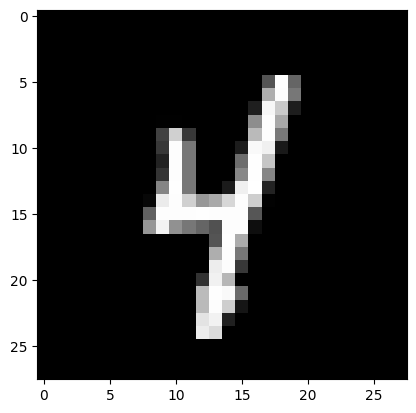

Label: 4


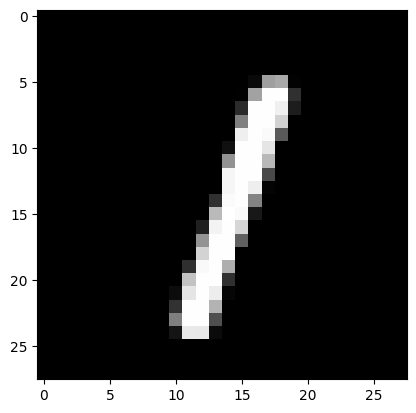

Label: 1


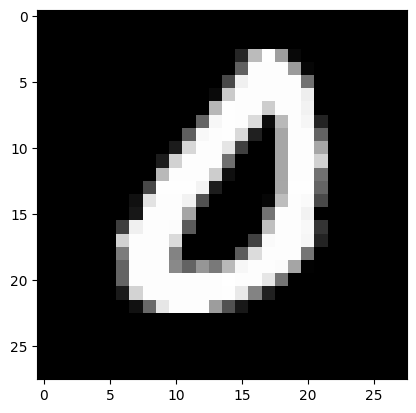

Label: 0


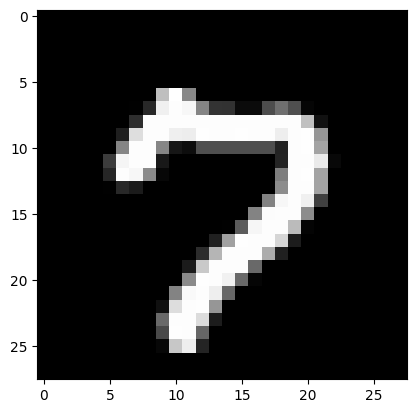

Label: 7


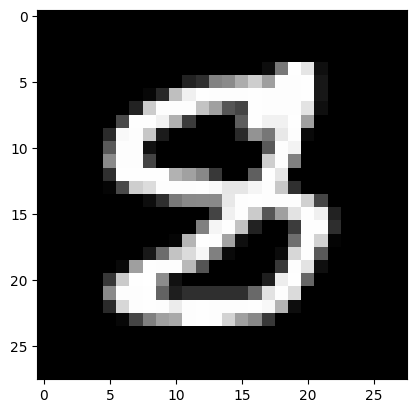

Label: 8


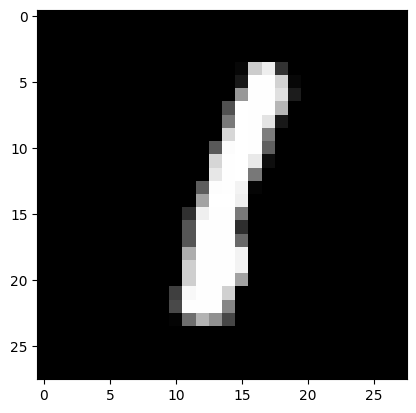

Label: 1


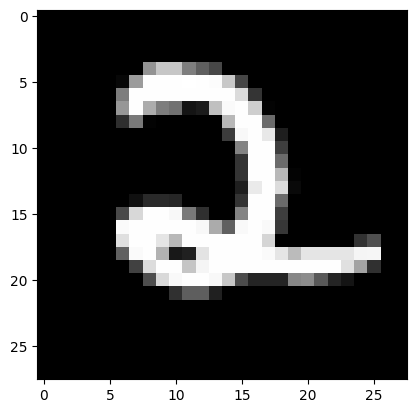

Label: 2


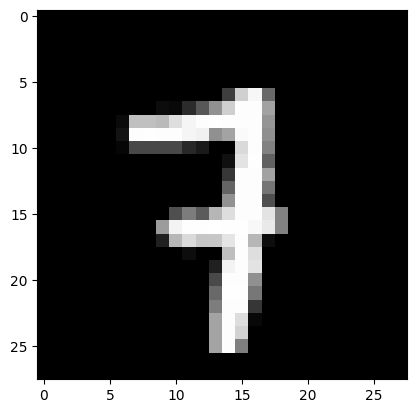

Label: 7


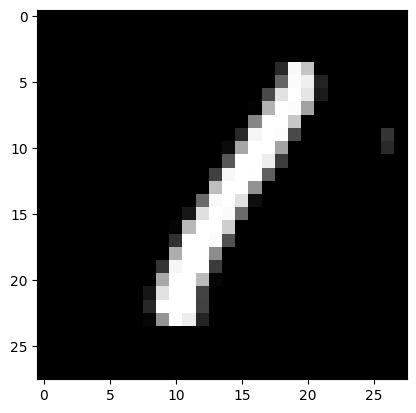

Label: 1


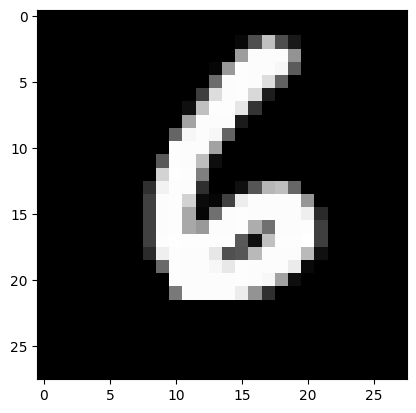

Label: 6


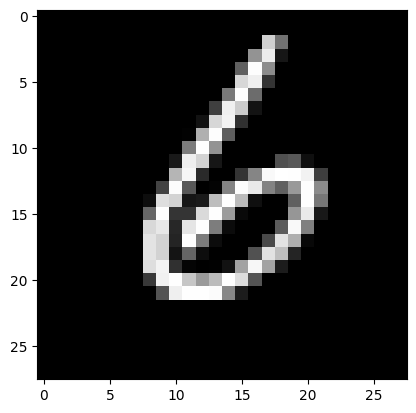

Label: 6


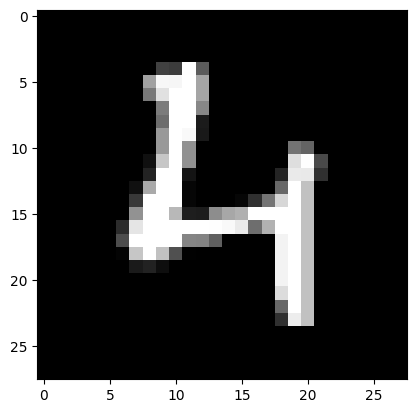

Label: 4


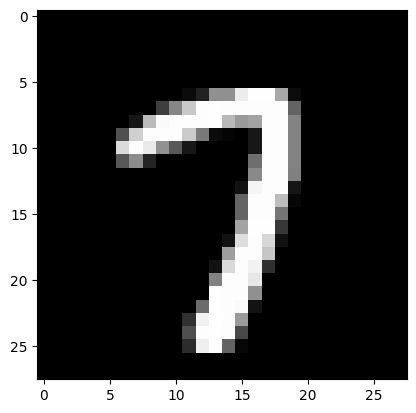

Label: 7


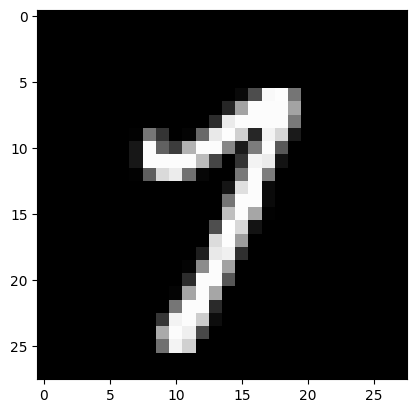

Label: 7


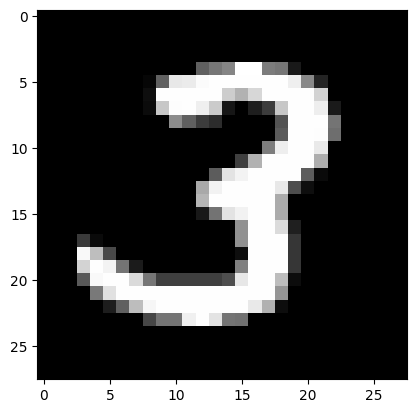

Label: 3


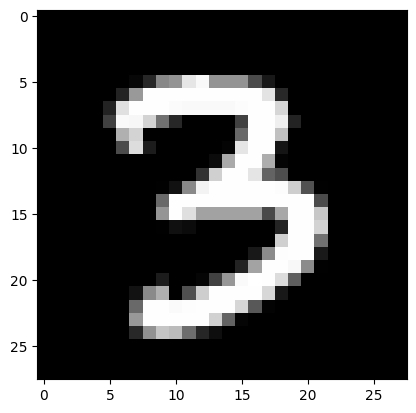

Label: 3


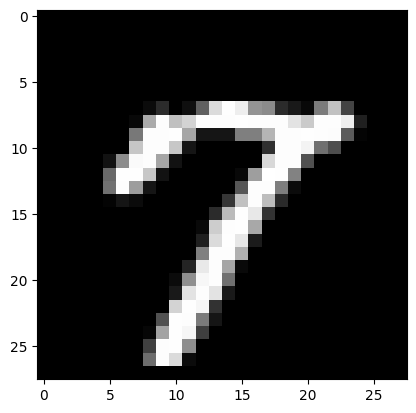

Label: 7


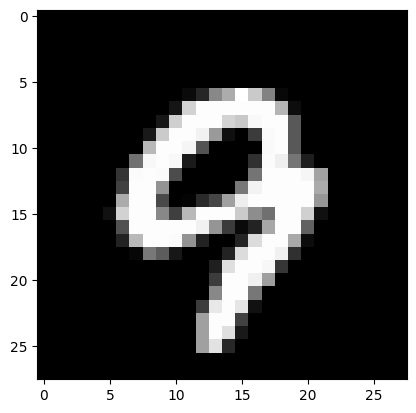

Label: 9


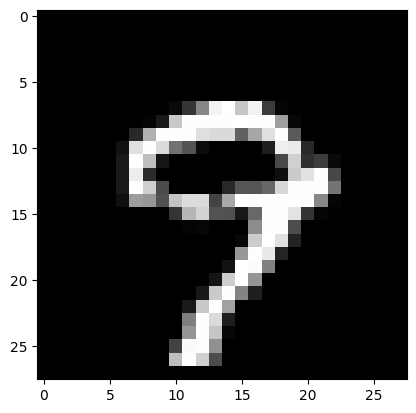

Label: 9


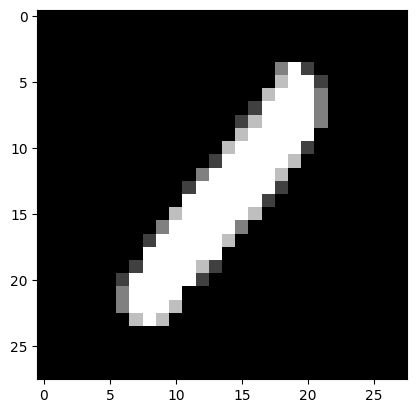

Label: 1


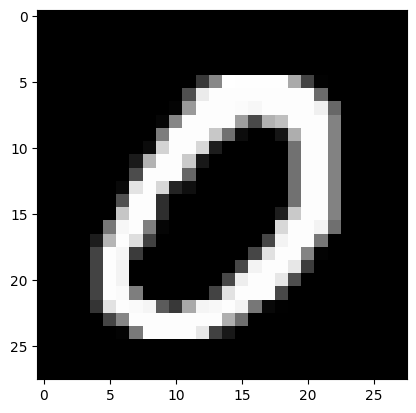

Label: 0


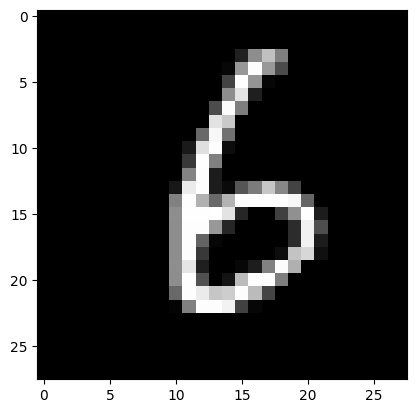

Label: 6


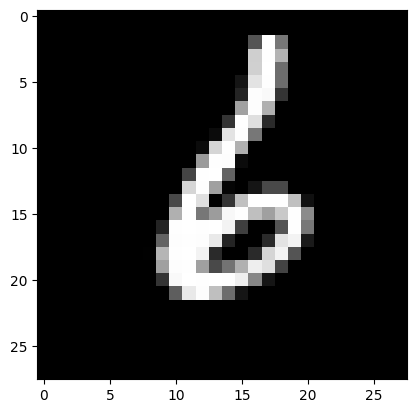

Label: 6


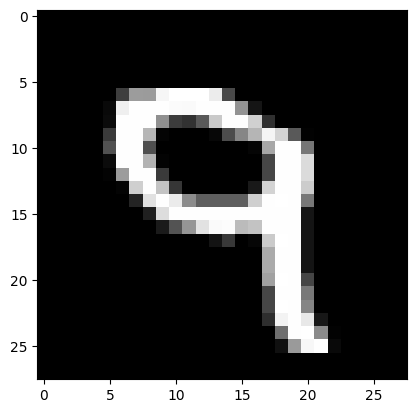

Label: 9


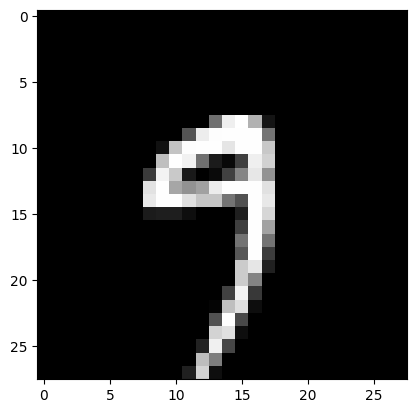

Label: 9


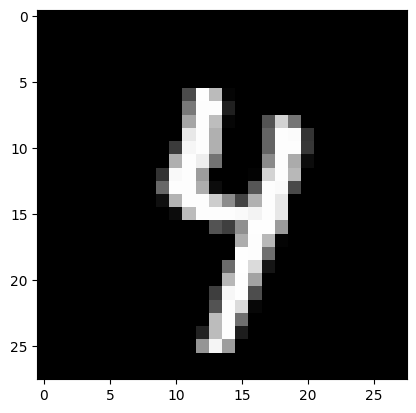

Label: 4


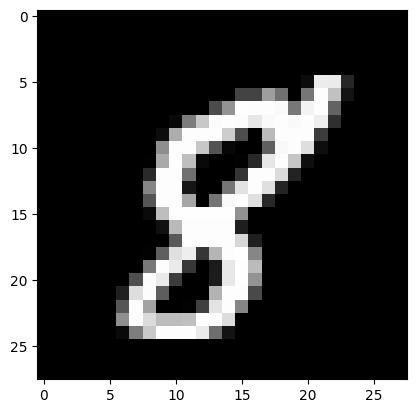

Label: 8


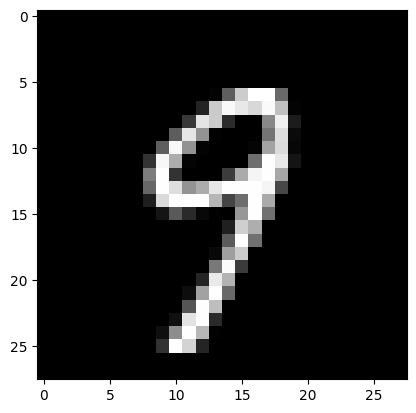

Label: 9


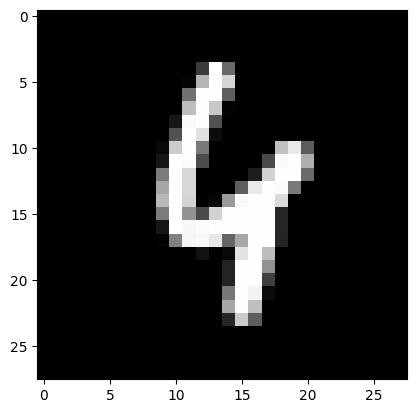

Label: 4


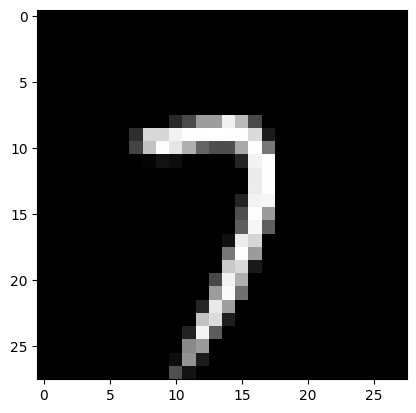

Label: 7


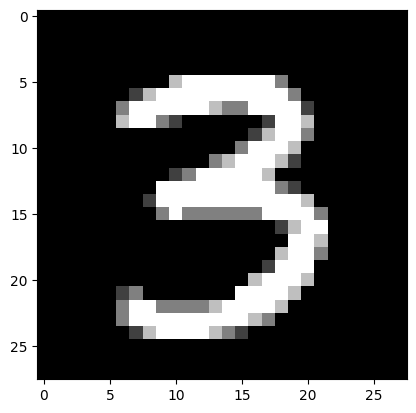

Label: 3


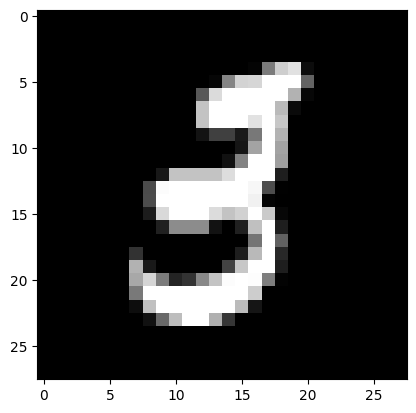

Label: 3


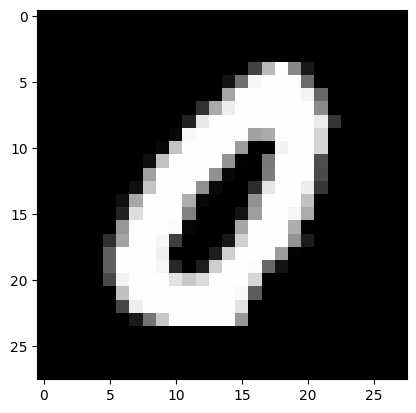

Label: 0


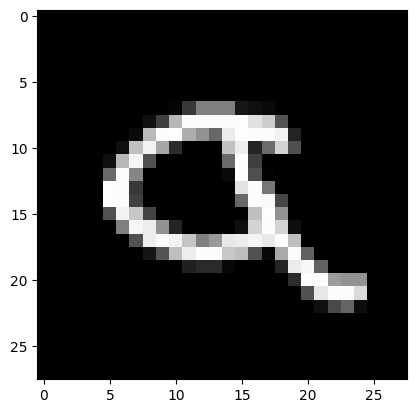

Label: 9


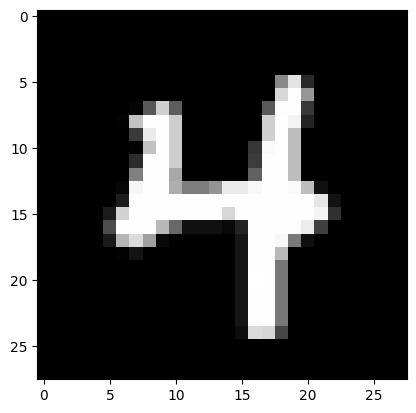

Label: 4


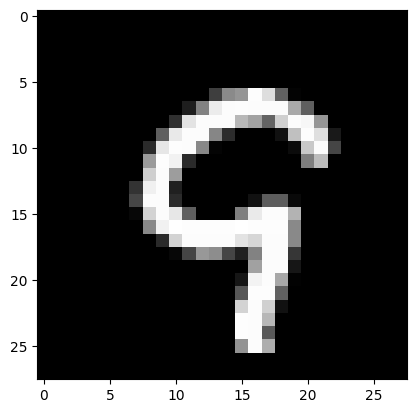

Label: 9


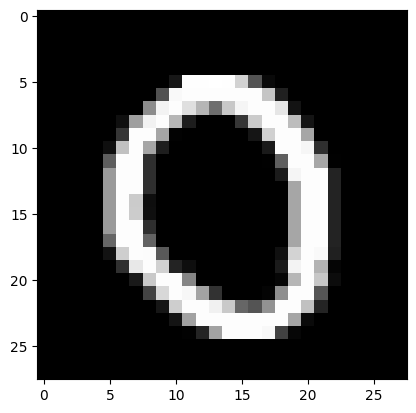

Label: 0


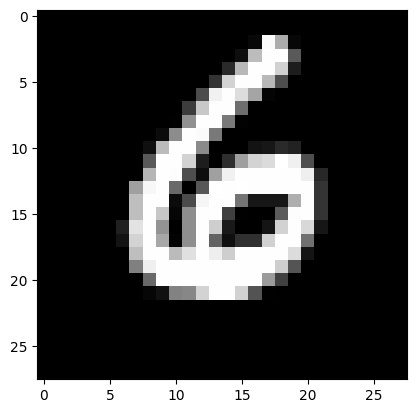

Label: 6


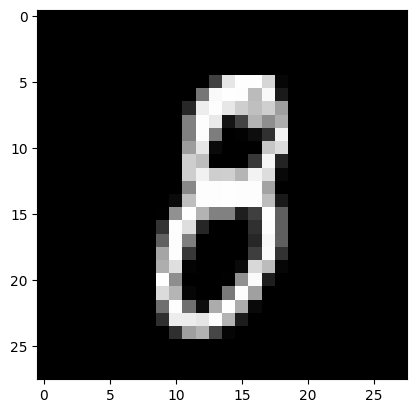

Label: 8


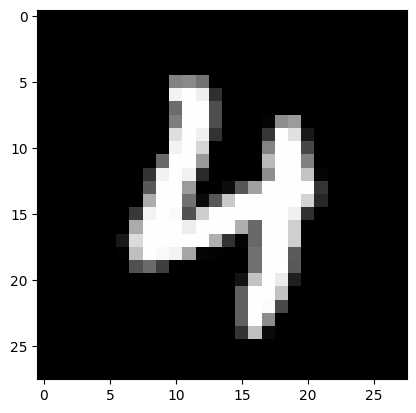

Label: 4


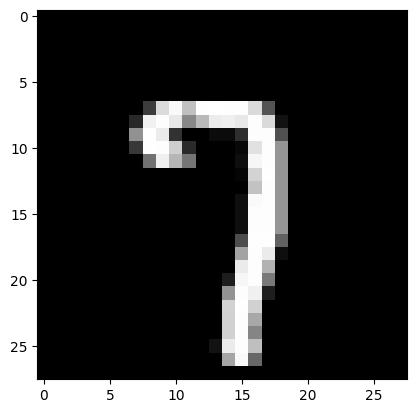

Label: 7


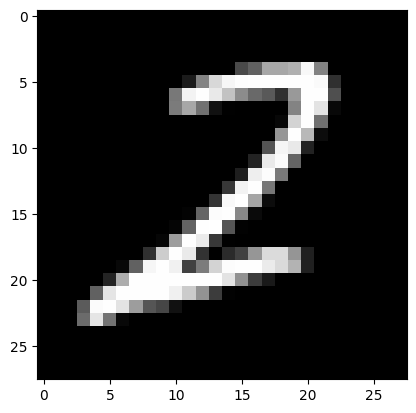

Label: 2


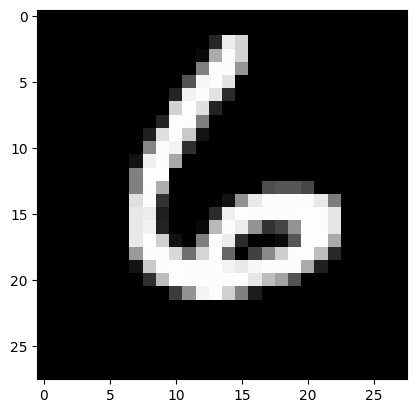

Label: 6


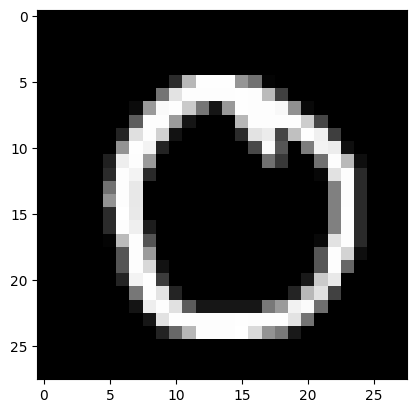

Label: 0


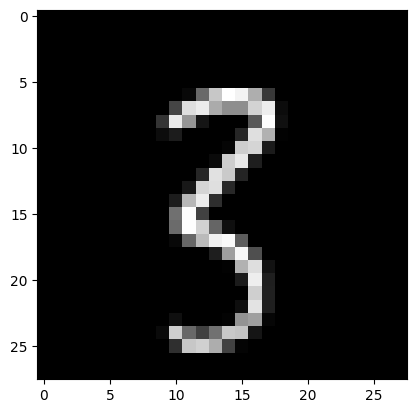

Label: 3


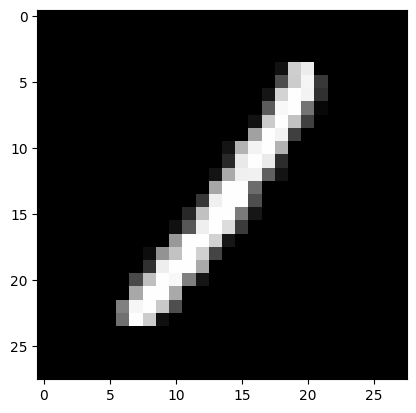

Label: 1


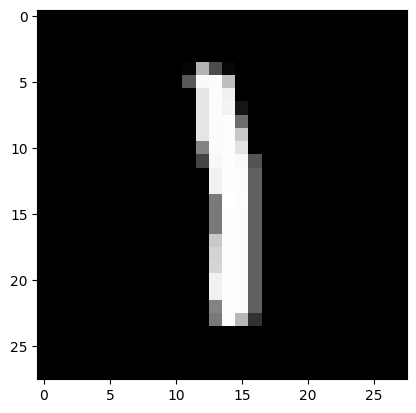

Label: 1


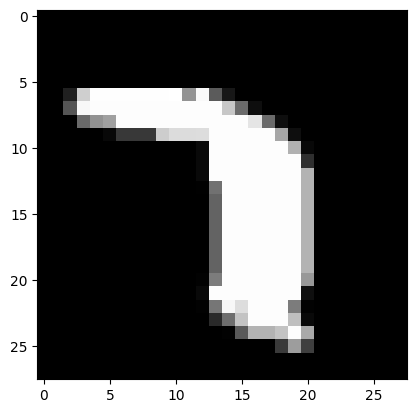

Label: 7


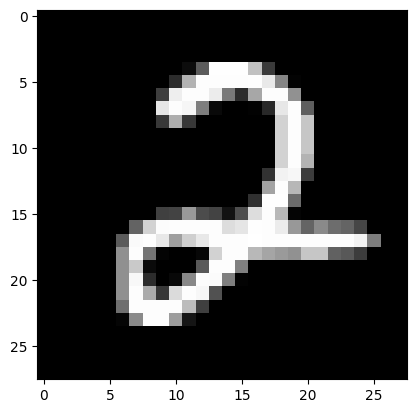

Label: 2


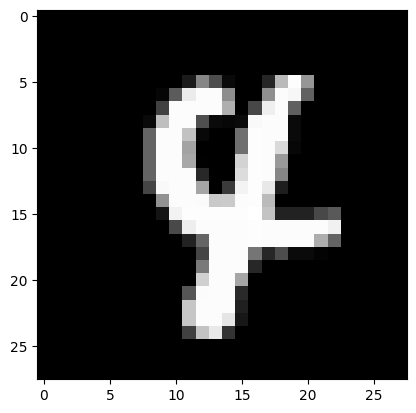

Label: 4


In [57]:
mnist_example = mnist_train.take(50)
for sample in mnist_example:
    image, label = sample[0].numpy(), sample[1].numpy()
    plt.imshow(image[:, :, 0].astype(np.uint8), cmap=plt.get_cmap("gray"))
    plt.show()
    print("Label: %d" % label)

In [58]:
np.argmax(y_predicted[2])

0